In [1]:
%autoreload 2
%matplotlib inline

In [16]:
import pandas as pd
from astropy.io import fits
import matplotlib.pyplot as plt

In [3]:
import astropy.wcs.wcs as wcs

# Initialize data directory

In [4]:
path = "../../Data/"

In [6]:
!ls $path/Subaru_data

G.cat          G_cropped.fits I.fits.fz      R.cat          R.shape        crop_fits.md
G.fits         I.cat          I_cropped.fits R.fits         RGB.fits       crop_fits.sh
G.fits.fz      I.fits         MACS1752.png   R.fits.fz      R_cropped.fits p358Dust.fits


# Dust data

In [22]:
!open $path

In [8]:
dust = fits.open(path + "/Subaru_data/p358Dust.fits")

In [11]:
dust

In [14]:
w = wcs.WCS(dust[0].header)

In [12]:
dust[0].header

SIMPLE  =                    T                                                  
BITPIX  =                  -64                                                  
NAXIS   =                    2                                                  
NAXIS1  =                   82                                                  
NAXIS2  =                   82                                                  
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BUNIT   = 'mag E(B-V)'                                                          
CTYPE1  = 'RA---TAN'                                                            
CTYPE2  = 'DEC--TAN'                                                            
CRVAL1  =           273.000000                                                  
CRVAL2  =            40.0000

In [31]:
pix_coords = np.array([[i, j] for i in range(dust[0].data.shape[0])
              for j in range(dust[0].data.shape[1])])

In [36]:
wcs_coords = w.wcs_pix2world(pix_coords, 1)

In [61]:
wcs_x = np.array(wcs_coords.transpose()[0])
wcs_y = np.array(wcs_coords.transpose()[1])

In [62]:
wcs_x = wcs_x.reshape((dust[0].data.shape[0], dust[0].data.shape[1]))
wcs_y = wcs_y.reshape((dust[0].data.shape[0], dust[0].data.shape[1]))

## convert pixel to WCS so we can apply correction to data catalog

<matplotlib.colorbar.Colorbar instance at 0x1239f4200>

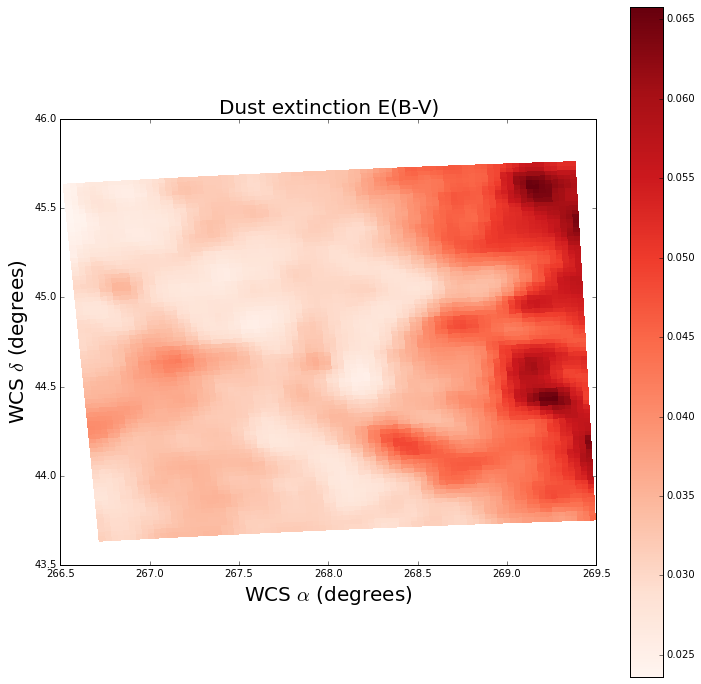

In [69]:
plt.figure(figsize=(12, 12))
plt.axes().set_aspect("equal")
plt.pcolor(wcs_x, wcs_y, dust[0].data.transpose(), cmap=plt.cm.Reds)
plt.title("Dust extinction E(B-V)", size=20)
plt.ylabel(r"WCS $\delta$ (degrees)", size=20)
plt.xlabel(r"WCS $\alpha$ (degrees)", size=20)
plt.colorbar()

* checked the features of the above image with DS9
* ready to do dust extinction correction